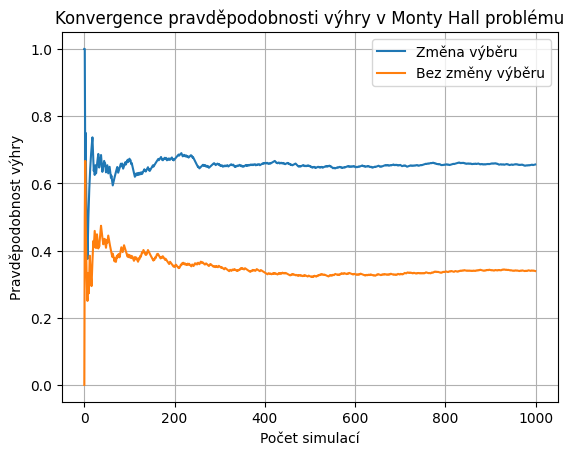

In [1]:
# Monty Hall Problem -- Graph
import random
import matplotlib.pyplot as plt

def monty_hall(simulations=1000, change_door=True):
    wins = 0
    win_rates = []  # Pro uložení průběžné výherní sazby
    
    for i in range(1, simulations + 1):
        # Nastavení
        doors = [False, False, False]
        car_position = random.randint(0, 2)
        doors[car_position] = True

        # Vyberte si dveře
        choice = random.randint(0, 2)

        # Moderátor otevře dveře s kozou
        remaining_doors = [j for j in range(3) if j != choice and doors[j] == False]
        opened_door = random.choice(remaining_doors)

        # Rozhodněte se, zda změníte svůj výběr
        if change_door:
            remaining_doors = [j for j in range(3) if j != choice and j != opened_door]
            choice = remaining_doors[0]

        # Zjistěte, zda jste vyhráli
        if doors[choice]:
            wins += 1
        
        # Uložení průběžné výherní sazby
        win_rates.append(wins / i)

    return win_rates

# Nastavení počtu simulací
simulations = 1000

# Vykreslení grafu
plt.plot(monty_hall(simulations, True), label='Změna výběru')
plt.plot(monty_hall(simulations, False), label='Bez změny výběru')
plt.xlabel('Počet simulací')
plt.ylabel('Pravděpodobnost výhry')
plt.title('Konvergence pravděpodobnosti výhry v Monty Hall problému')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import random
import plotly.graph_objects as go

def monty_hall(simulations=1000, change_door=True):
    wins = 0
    win_rates = []  # For storing the progressive win rate

    for i in range(1, simulations + 1):
        # Setup
        doors = [False, False, False]
        car_position = random.randint(0, 2)
        doors[car_position] = True

        # Choose a door
        choice = random.randint(0, 2)

        # Host opens a door with a goat
        remaining_doors = [j for j in range(3) if j != choice and doors[j] == False]
        opened_door = random.choice(remaining_doors)

        # Decide whether to change your choice
        if change_door:
            remaining_doors = [j for j in range(3) if j != choice and j != opened_door]
            choice = remaining_doors[0]

        # Determine if you've won
        if doors[choice]:
            wins += 1

        # Save the progressive win rate
        win_rates.append(wins / i)

    return win_rates

# Set the number of simulations
simulations = 1000

# Plotting
fig = go.Figure()
fig.add_trace(go.Scatter(y=monty_hall(simulations, True), mode='lines', name='Change Choice'))
fig.add_trace(go.Scatter(y=monty_hall(simulations, False), mode='lines', name='Keep Choice'))
fig.update_layout(title='Convergence of Win Probability in the Monty Hall Problem',
                   xaxis_title='Number of Simulations',
                   yaxis_title='Win Probability',
                   legend_title='Door Choice',
                   template='plotly_white')
fig.show()


In [11]:
import json
from collections import defaultdict

# Soubor, kde budou uloženy informace o zápasech
data_file = 'matches.json'

# Struktura pro ukládání a výpočet statistik týmů a hráčů
team_stats = defaultdict(lambda: {'wins': 0, 'draws': 0, 'losses': 0, 'scored': 0, 'conceded': 0})
player_stats = defaultdict(int)

# Funkce pro načtení dat ze souboru
def load_data():
    try:
        with open(data_file, 'r') as f:
            data = json.load(f)
            return data
    except FileNotFoundError:
        return []

# Funkce pro uložení dat do souboru
def save_data(data):
    with open(data_file, 'w') as f:
        json.dump(data, f)

# Funkce pro přidání zápasu
def add_match():
    date = input('Datum zápasu (DD.MM.YYYY): ')
    team1 = input('Domácí tým: ')
    team2 = input('Hostující tým: ')
    result = input('Výsledek (góly domácích:góly hostů): ')
    scorers = input('Střelci (jméno hráče a počet gólů, odděleno čárkou): ')

    # Aktualizace statistik týmů a hráčů
    goals_team1, goals_team2 = map(int, result.split(':'))
    update_team_stats(team1, team2, goals_team1, goals_team2)
    update_player_stats(scorers)

    # Uložení záznamu o zápase
    match = {'date': date, 'team1': team1, 'team2': team2, 'result': result, 'scorers': scorers}
    matches = load_data()
    matches.append(match)
    save_data(matches)
    print('Zápas byl úspěšně přidán.')

# Funkce pro aktualizaci statistik týmů
def update_team_stats(team1, team2, goals_team1, goals_team2):
    team_stats[team1]['scored'] += goals_team1
    team_stats[team1]['conceded'] += goals_team2
    team_stats[team2]['scored'] += goals_team2
    team_stats[team2]['conceded'] += goals_team1

    if goals_team1 > goals_team2:  # Vítězství domácích
        team_stats[team1]['wins'] += 1
        team_stats[team2]['losses'] += 1
    elif goals_team1 < goals_team2:  # Vítězství hostů
        team_stats[team2]['wins'] += 1
        team_stats[team1]['losses'] += 1
    else:  # Remíza
        team_stats[team1]['draws'] += 1
        team_stats[team2]['draws'] += 1

# Function for updating player statistics
def update_player_stats(scorers):
    if scorers.strip():  # If there are any scorers
        for scorer_info in scorers.split(','):
            parts = scorer_info.strip().rsplit(' ', 1)  # Split from the right to get the last part as goals
            if len(parts) == 2:  # Ensuring that there is a name and a goal count
                name, goals = parts
                player_stats[name.strip()] += int(goals)


# Funkce pro výpis ligové tabulky
def print_league_table():
    print('Ligová tabulka:')
    # Třídění týmů podle bodů a gólového rozdílu
    sorted_teams = sorted(team_stats.items(), key=lambda x: (x[1]['wins']*3 + x[1]['draws'], x[1]['scored'] - x[1]['conceded']), reverse=True)
    for team, stats in sorted_teams:
        points = stats['wins']*3 + stats['draws']
        print(f'{team}: {points} points, Goals: {stats["scored"]}-{stats["conceded"]}, Wins: {stats["wins"]}, Draws: {stats["draws"]}, Losses: {stats["losses"]}')

# Function for printing the top scorers table
def print_top_scorers():
    print('Top scorers:')
    # Sorting players by the number of goals
    sorted_scorers = sorted(player_stats.items(), key=lambda x: x[1], reverse=True)
    for player, goals in sorted_scorers:
        print(f'{player}: {goals} goals')

#def main():
# Load existing matches and update statistics
existing_matches = load_data()
for match in existing_matches:
    team1, team2 = match['team1'], match['team2']
    goals_team1, goals_team2 = map(int, match['result'].split(':'))
    scorers = match['scorers']
    update_team_stats(team1, team2, goals_team1, goals_team2)
    update_player_stats(scorers)

# Main application loop
while True:
    print("\nAvailable actions: [1] Add match, [2] Show league table, [3] Show top scorers, [4] Exit")
    action = input("Select an action (1-4): ")

    if action == '1':
        add_match()
    elif action == '2':
        print_league_table()
    elif action == '3':
        print_top_scorers()
    elif action == '4':
        print("Exiting application...")
        break
    else:
        print("Invalid action, please choose again.")

#main()


Available actions: [1] Add match, [2] Show league table, [3] Show top scorers, [4] Exit
Ligová tabulka:
Team D: 4 points, Goals: 5-2, Wins: 1, Draws: 1, Losses: 0
Team A: 4 points, Goals: 3-2, Wins: 1, Draws: 1, Losses: 0
Team B: 1 points, Goals: 3-4, Wins: 0, Draws: 1, Losses: 1
Team C: 1 points, Goals: 1-4, Wins: 0, Draws: 1, Losses: 1

Available actions: [1] Add match, [2] Show league table, [3] Show top scorers, [4] Exit
Top scorers:
John Doe: 3 goals
Michael Brown: 3 goals
Jane Smith: 2 goals
Alex Johnson: 2 goals
Christopher Walker: 1 goals
Emily White: 1 goals

Available actions: [1] Add match, [2] Show league table, [3] Show top scorers, [4] Exit
Top scorers:
John Doe: 3 goals
Michael Brown: 3 goals
Jane Smith: 2 goals
Alex Johnson: 2 goals
Christopher Walker: 1 goals
Emily White: 1 goals

Available actions: [1] Add match, [2] Show league table, [3] Show top scorers, [4] Exit
Exiting application...


In [15]:
# case-switch statement
done = False
while not done:
    print("\nAvailable actions: [1] Add match, [2] Show league table, [3] Show top scorers, [4] Exit")

    action = input("Select an action (1-4): ")

    match action:
        case '1':
            add_match()
        case '2':
            print_league_table()
        case '3':
            print_top_scorers()
        case '4':
            print("Exiting application...")
            done = True
        case _:
            print("Invalid action, please choose again.")


Available actions: [1] Add match, [2] Show league table, [3] Show top scorers, [4] Exit

Available actions: [1] Add match, [2] Show league table, [3] Show top scorers, [4] Exit
Ligová tabulka:
Team D: 4 points, Goals: 5-2, Wins: 1, Draws: 1, Losses: 0
Team A: 4 points, Goals: 3-2, Wins: 1, Draws: 1, Losses: 0
Team B: 1 points, Goals: 3-4, Wins: 0, Draws: 1, Losses: 1
Team C: 1 points, Goals: 1-4, Wins: 0, Draws: 1, Losses: 1

Available actions: [1] Add match, [2] Show league table, [3] Show top scorers, [4] Exit
Exiting application...
